# Collective Communication Bottlenecks and Variability in Distributed Mixture-of-Experts Computation
This notebook includes the raw traces, data and code for generating the figures in the featured paper.

We preserve the figure labels from the paper and delineate each code cell accordingly. Each cell contains the following:
- Documentation
- Dataset and code for a specific figure

We start with necessary imports. Ensure to install missing packages via pip

In [2]:
import re
import bisect
import math

import numpy as np
from matplotlib import pyplot
import matplotlib.ticker as ticker
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.transforms import (Bbox, TransformedBbox,
                                   blended_transform_factory)
from mpl_toolkits.axes_grid1.inset_locator import (BboxConnector,
                                                   BboxConnectorPatch,
                                                   BboxPatch)

# Figure 1
Plots a specific case of **Equation 1**, $A(L) = $ below for GPT-3 MoE implemented in [Megatron-Deepspeed](https://github.com/microsoft/Megatron-DeepSpeed/tree/main/examples_deepspeed/MoE) based on configurations due to [Brown 2020](https://arxiv.org/abs/2005.14165)
\begin{equation}
A(L) = \frac{L}{k}\cdot A_m \cdot x 
\end{equation}
$$\mathrm{Subst.} \ A_m=2,\ p=2, \ x=3, \; \therefore A(L)=3 \cdot L $$

In [6]:
def single_line_plot(x_tick_labels: list, aux_x_tick_labels: list, data_y: list, title: str) -> None:
    fig, axs = pyplot.subplots(figsize=(6, 5), dpi=300)
    fig.suptitle(title, fontsize=12)
    x = np.linspace(1, len(data_y), num=len(data_y))

    axs.plot(x, data_y, 'tab:green', marker="d")
    axs.set_xticks(x, labels=x_tick_labels)
    axs.set_xlabel("Num of Parameters", fontweight='bold')
    axs.set_ylabel("$A(L)$")
    axs.grid()
    stats = "$A(L) = 3 \\cdot L$"
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    axs.text(0.3, 0.75, stats, fontsize=12, bbox=bbox,
             transform=axs.transAxes, horizontalalignment='left')

    ax2 = axs.twiny()
    ax2.plot(x, data_y, 'tab:green', marker="d")
    ax2.set_xticks(x, labels=aux_x_tick_labels)
    ax2.set_xlabel(r"Num of Layers $(L)$", fontweight='bold', fontsize=9)
    fig.tight_layout()
    pyplot.show()

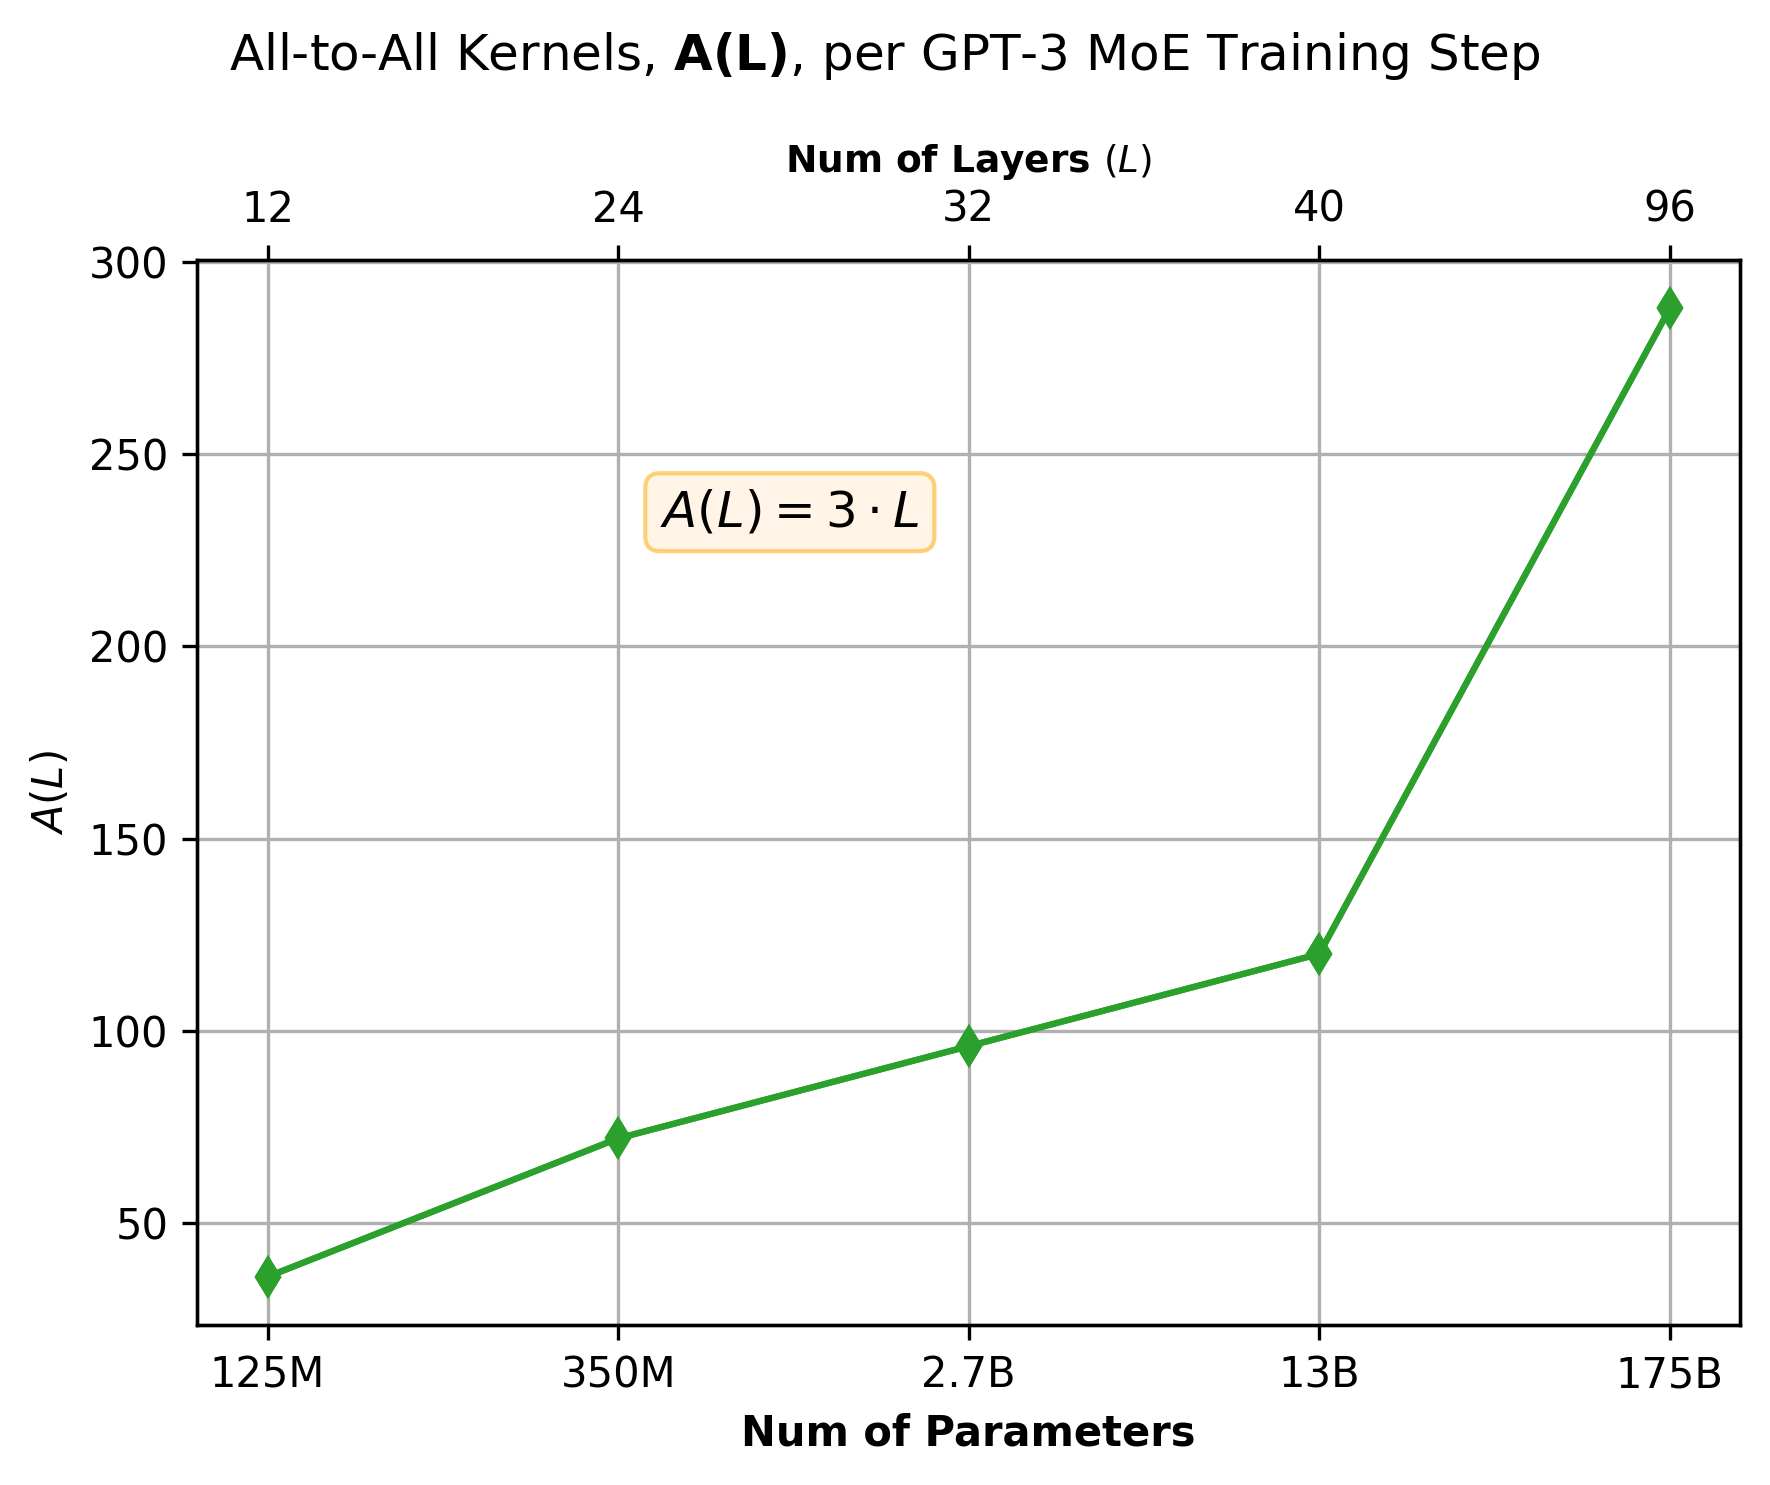

In [11]:
single_line_plot(["125M", "350M", "2.7B", "13B", "175B"], 
                 ["12", "24", "32", "40", "96"], 
                 [36, 72, 96, 120, 288], 
                 r"All-to-All Kernels, $\mathbf{A(L)}$, per GPT-3 MoE Training Step")